# PCA


In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("n_clusters %d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("n_clusters %d"%n_clusters+title_str)

    plt.axis("off")
    return

In [3]:
datos_vector=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_imputados.xlsx")

In [4]:
datos_vector['PUNT_GLOBAL_mean'].min()
datos_vector['PUNT_GLOBAL_mean'].max()

417.0

In [5]:
def calculo_calif(valor):
    texto=""
    if valor>400:
        texto="Clase 5"
    elif valor>300:
        texto="Clase 4"
    elif valor>200:
        texto="Clase 3"
    elif valor>100:
        texto="Clase 2"
    elif valor>=0:
        texto="Clase 1"
    return texto

def calculo_calif2(valor):
    texto=""
    if valor>400:
        texto=5
    elif valor>300:
        texto=4
    elif valor>200:
        texto=3
    elif valor>100:
        texto=2
    elif valor>=0:
        texto=1
    return texto

In [6]:
datos_vector['clasificacion_planteles']=datos_vector['PUNT_GLOBAL_mean'].apply(lambda text: calculo_calif(text))
datos_vector['clasificacion_planteles2']=datos_vector['PUNT_GLOBAL_mean'].apply(lambda text: calculo_calif2(text))
X_datos=datos_vector[['COLE_AREA_UBICACION','COLE_CALENDARIO','COLE_CARACTER','COLE_GENERO','COLE_NATURALEZA','COLE_SEDE_PRINCIPAL',
                'FAMI_EDUCACIONMADRE_Postgrado','ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas',
                'ESTU_DEDICACIONINTERNET_Más de 3 horas','ESTU_DEDICACIONINTERNET_No Navega Internet',
                'FAMI_EDUCACIONMADRE_Educación profesional completa','FAMI_EDUCACIONMADRE_Educación profesional incompleta',
                'FAMI_EDUCACIONMADRE_Ninguno','FAMI_EDUCACIONMADRE_Primaria incompleta','FAMI_EDUCACIONMADRE_Técnica o tecnológica completa',
                'FAMI_EDUCACIONPADRE_Educación profesional completa','FAMI_EDUCACIONPADRE_Educación profesional incompleta',
                'FAMI_EDUCACIONPADRE_Postgrado','FAMI_ESTRATOVIVIENDA_Estrato 1','FAMI_ESTRATOVIVIENDA_Estrato 3','FAMI_ESTRATOVIVIENDA_Estrato 4',
                'FAMI_ESTRATOVIVIENDA_Estrato 5','FAMI_ESTRATOVIVIENDA_Estrato 6','FAMI_ESTRATOVIVIENDA_Sin Estrato','FAMI_PERSONASHOGAR_3 a 4',
                'FAMI_PERSONASHOGAR_9 o más','FAMI_TIENECOMPUTADOR_No','FAMI_TIENECOMPUTADOR_Si','FAMI_TIENEINTERNET_Si','FAMI_TIENEINTERNET_No']]
y_datos=datos_vector[['clasificacion_planteles']]

In [7]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [8]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8' , 'PC9', 'PC10',
               'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18' , 'PC19', 'PC20',
               'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28' , 'PC29', 'PC30']
)

,COLE_AREA_UBICACION,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,FAMI_EDUCACIONMADRE_Postgrado,ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas,ESTU_DEDICACIONINTERNET_Más de 3 horas,ESTU_DEDICACIONINTERNET_No Navega Internet,...,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_PERSONASHOGAR_3 a 4,FAMI_PERSONASHOGAR_9 o más,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENEINTERNET_No
PC1,-0.115551,0.014644,-0.019126,0.042204,0.005360,0.056828,0.159428,0.287553,0.276789,0.116293,...,0.174329,0.121494,0.068733,0.054971,0.288333,0.155523,0.166933,0.286824,0.283868,0.130647
PC2,0.037835,-0.114692,0.079017,-0.099765,-0.240512,-0.009137,-0.251245,0.041254,-0.013504,0.281767,...,-0.202177,-0.205033,-0.151743,0.198144,0.058862,0.210638,0.306002,-0.008885,-0.006687,0.312113
PC3,0.114467,0.172081,-0.013790,0.043228,0.001166,0.018869,0.285254,-0.105775,-0.138040,0.202825,...,0.138836,0.352467,0.385974,0.259153,-0.082912,0.063609,0.121323,-0.145110,-0.161431,0.177092
PC4,0.522942,-0.273160,0.307056,-0.092076,-0.489934,-0.489416,0.092268,0.037792,0.024881,-0.036335,...,0.077753,0.060357,0.031788,0.002306,0.028290,-0.078450,-0.047551,0.033731,0.025518,-0.030605
PC5,0.103286,-0.401836,-0.099542,0.367536,0.089217,0.098440,-0.024070,-0.129664,-0.112289,0.066597,...,0.267491,-0.047965,-0.358586,0.406240,-0.149868,0.141958,-0.031571,-0.140138,-0.150414,0.010203
PC6,0.065427,-0.045753,-0.806486,-0.315568,0.045872,-0.425879,-0.008784,0.007069,0.030781,0.010987,...,0.015032,0.008812,0.006704,0.082832,-0.011243,0.119962,-0.021117,0.020567,0.038308,-0.066652
PC7,0.011984,0.333601,-0.086048,0.801036,-0.030471,-0.420453,-0.059576,0.024877,0.037776,0.003296,...,-0.110408,-0.043637,0.044890,-0.064795,0.025926,0.044426,0.009942,0.037049,0.048999,-0.023125
PC8,0.217326,0.610136,0.276338,-0.259731,0.138423,-0.069087,-0.107822,-0.040229,0.037235,0.014728,...,0.014050,-0.047513,-0.068379,0.383168,-0.064915,0.224262,-0.088278,0.002600,0.013966,-0.124041
PC9,0.545259,0.024906,-0.295425,0.173281,-0.225073,0.600123,-0.004135,0.062543,0.081323,-0.026116,...,-0.135585,-0.028835,0.166585,0.057488,0.049273,0.011965,-0.061022,0.086480,0.089340,-0.081887
PC10,-0.299500,-0.376527,0.157846,0.048269,0.007787,-0.056801,0.035013,0.053531,0.088688,-0.186297,...,-0.299917,-0.045986,0.440867,0.321736,-0.055805,0.395922,-0.090873,0.053963,0.082691,-0.162424


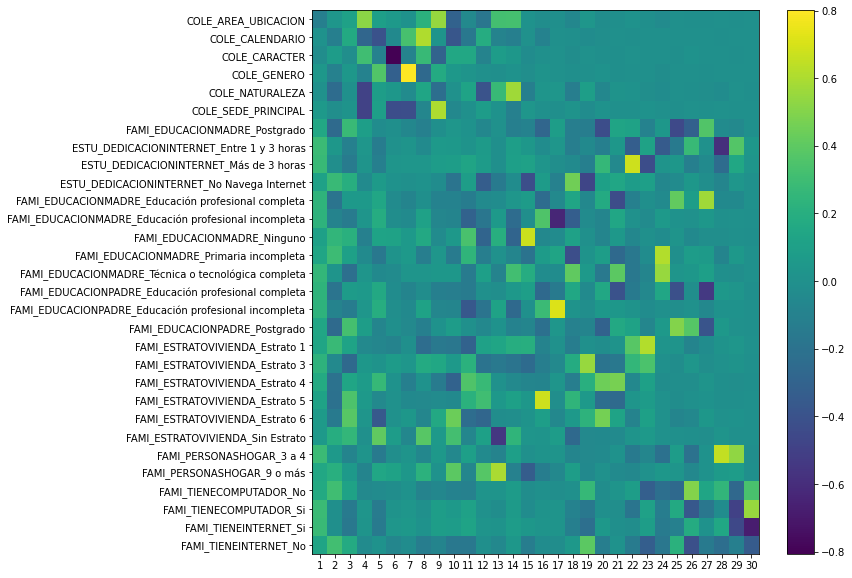

In [9]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_datos.columns)), X_datos.columns)
plt.xticks(range(len(X_datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.55587349e-01 2.09800664e-01 8.57634099e-02 4.57392558e-02
 3.43115640e-02 3.26678386e-02 3.01995731e-02 2.91099169e-02
 2.52949783e-02 2.31826409e-02 2.00529957e-02 1.57065559e-02
 1.29403044e-02 1.18541430e-02 9.88445968e-03 9.49497061e-03
 8.18227158e-03 7.81832983e-03 6.11245310e-03 5.78811449e-03
 5.29450481e-03 3.66827486e-03 2.89564837e-03 2.73815616e-03
 1.71932801e-03 1.63472429e-03 1.12226631e-03 9.19744007e-04
 4.80442941e-04 3.51213115e-05]


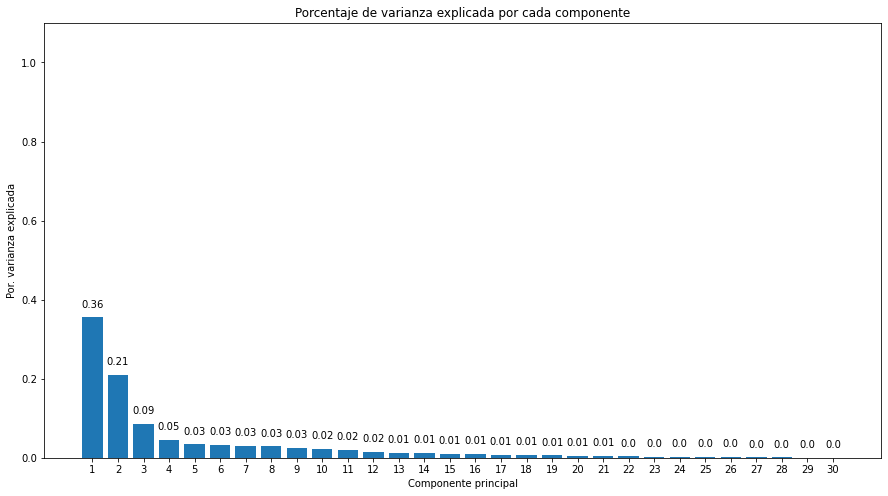

In [10]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35558735 0.56538801 0.65115142 0.69689068 0.73120224 0.76387008
 0.79406965 0.82317957 0.84847455 0.87165719 0.89171019 0.90741674
 0.92035705 0.93221119 0.94209565 0.95159062 0.95977289 0.96759122
 0.97370367 0.97949179 0.98478629 0.98845457 0.99135022 0.99408837
 0.9958077  0.99744243 0.99856469 0.99948444 0.99996488 1.        ]


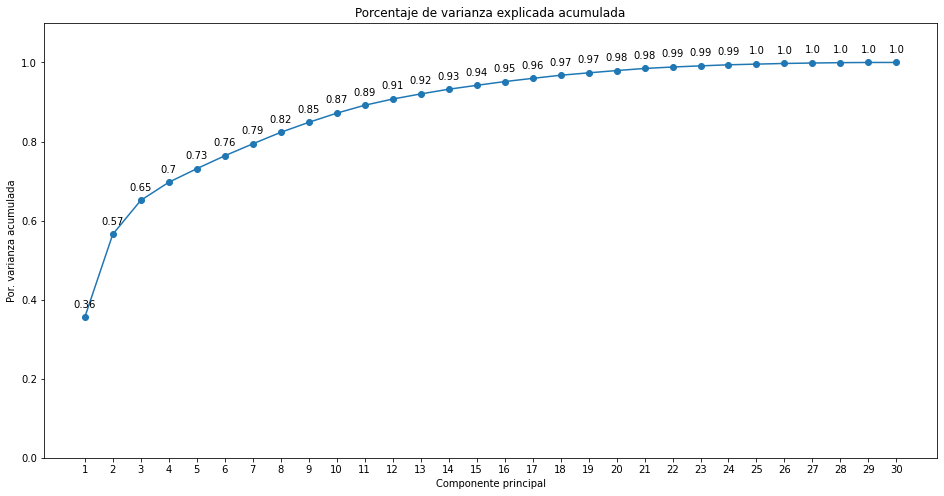

In [11]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.plot(
    np.arange(len(X_datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [12]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=X_datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8' , 'PC9', 'PC10',
'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18' , 'PC19', 'PC20',
'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28' , 'PC29', 'PC30'],
    index   = X_datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.889335,-0.657510,-0.521727,-0.129625,-0.097746,-0.401621,-0.334064,-0.252064,-0.091143,0.587713,...,0.025672,-0.045916,0.043056,0.061539,-0.003436,0.010215,0.015964,0.058108,0.003611,0.019326
1,-2.951948,-0.732430,-0.540810,-0.102478,-0.144902,-0.444927,-0.350834,-0.332130,-0.097562,0.445133,...,0.038548,-0.021524,0.038587,0.047890,-0.019096,0.038586,0.015357,0.034776,-0.013197,0.007947
2,-2.910100,-0.805754,-0.537912,-0.391543,-0.062568,0.321630,-0.266205,-0.596332,0.188785,0.296576,...,0.046955,-0.035535,0.037873,0.033135,-0.007818,0.014282,0.014192,0.063055,-0.014648,0.005873
3,-2.846209,-0.733572,-0.521544,-0.418855,-0.014189,0.366873,-0.248740,-0.511574,0.196763,0.445689,...,0.030392,-0.004868,0.013319,0.058513,0.003445,-0.005495,0.016114,0.048335,0.006141,0.006160
4,-3.070914,-0.720458,-0.634923,1.776933,-0.503157,1.172959,1.238040,-0.067783,-2.382418,0.626060,...,0.156439,-0.081217,0.015763,0.071658,-0.001905,0.015939,0.022527,0.003948,0.009299,0.004940


In [13]:
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.889335,-0.657510,-0.521727,-0.129625,-0.097746,-0.401621,-0.334064,-0.252064,-0.091143,0.587713,...,0.025672,-0.045916,0.043056,0.061539,-0.003436,0.010215,0.015964,0.058108,0.003611,0.019326
1,-2.951948,-0.732430,-0.540810,-0.102478,-0.144902,-0.444927,-0.350834,-0.332130,-0.097562,0.445133,...,0.038548,-0.021524,0.038587,0.047890,-0.019096,0.038586,0.015357,0.034776,-0.013197,0.007947
2,-2.910100,-0.805754,-0.537912,-0.391543,-0.062568,0.321630,-0.266205,-0.596332,0.188785,0.296576,...,0.046955,-0.035535,0.037873,0.033135,-0.007818,0.014282,0.014192,0.063055,-0.014648,0.005873
3,-2.846209,-0.733572,-0.521544,-0.418855,-0.014189,0.366873,-0.248740,-0.511574,0.196763,0.445689,...,0.030392,-0.004868,0.013319,0.058513,0.003445,-0.005495,0.016114,0.048335,0.006141,0.006160
4,-3.070914,-0.720458,-0.634923,1.776933,-0.503157,1.172959,1.238040,-0.067783,-2.382418,0.626060,...,0.156439,-0.081217,0.015763,0.071658,-0.001905,0.015939,0.022527,0.003948,0.009299,0.004940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,1.405686,-1.452494,-0.470122,-0.526161,-1.168692,-0.215744,0.812152,2.912017,0.841197,-1.515486,...,-0.031217,-0.419339,0.267028,-0.526285,0.156479,0.102280,-0.117686,0.104725,0.178376,-0.035970
33784,-1.735616,-2.356763,0.239237,-2.117034,-1.105675,0.276963,0.686376,1.904837,-0.258940,-1.181644,...,0.119204,0.191066,-0.030163,-0.037648,-0.173111,-0.201802,0.139145,0.033273,-0.049405,-0.008865
33785,3.174010,-2.268191,-1.462776,-0.721394,-1.132030,-1.814812,0.497788,3.484810,-0.801364,-0.729117,...,0.280915,-0.357243,0.276141,0.023695,0.474933,-0.193445,0.275021,-0.157019,-0.024247,0.001443
33786,-1.879486,-2.775183,1.721221,-0.832625,-1.453574,0.416386,0.666489,2.005063,1.043604,-1.480725,...,-0.299492,-0.066287,0.128910,-0.204313,0.320864,0.114338,0.043196,0.024589,-0.018874,0.003038


In [14]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = X_datos.columns,
                    index   = X_datos.index
)
print('------------------')
print('Valores  reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(X_datos.head())

------------------
Valores  reconstruidos
------------------


,COLE_AREA_UBICACION,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,FAMI_EDUCACIONMADRE_Postgrado,ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas,ESTU_DEDICACIONINTERNET_Más de 3 horas,ESTU_DEDICACIONINTERNET_No Navega Internet,...,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_PERSONASHOGAR_3 a 4,FAMI_PERSONASHOGAR_9 o más,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENEINTERNET_No
0,5.551115e-17,4.093947e-16,1.000000e+00,-2.567391e-16,-6.106227e-16,1.000000e+00,-1.998401e-15,-1.421085e-14,-1.243450e-14,1.776357e-15,...,8.881784e-16,-8.881784e-16,-2.331468e-15,8.881784e-16,-2.486900e-14,1.000000e+00,-3.552714e-15,1.000000e+00,-2.131628e-14,0.000000e+00
1,1.665335e-16,4.440892e-16,1.000000e+00,-2.289835e-16,-6.106227e-16,1.000000e+00,-1.998401e-15,-2.131628e-14,-1.421085e-14,1.332268e-15,...,-8.881784e-16,-1.554312e-15,-1.887379e-15,8.881784e-16,-1.421085e-14,-4.440892e-16,-7.105427e-15,-4.263256e-14,-4.263256e-14,7.105427e-15
2,5.551115e-17,3.261280e-16,4.440892e-16,-2.012279e-16,-4.996004e-16,1.000000e+00,-2.664535e-15,-1.421085e-14,-1.421085e-14,8.881784e-16,...,-1.776357e-15,-1.776357e-15,-4.440892e-16,1.110223e-15,1.000000e+00,-4.440892e-16,-7.105427e-15,1.000000e+00,1.000000e+00,3.552714e-15
3,5.551115e-17,3.538836e-16,0.000000e+00,-2.220446e-16,-4.996004e-16,1.000000e+00,-3.108624e-15,-1.776357e-14,1.000000e+00,1.776357e-15,...,-1.332268e-15,-1.332268e-15,-7.771561e-16,8.881784e-16,-2.131628e-14,1.000000e+00,-3.552714e-15,1.000000e+00,1.000000e+00,0.000000e+00
4,6.661338e-16,9.020562e-17,1.000000e+00,1.040834e-16,-1.110223e-16,7.771561e-16,-2.442491e-15,1.000000e+00,-1.776357e-15,1.776357e-15,...,1.000000e+00,1.110223e-15,4.329870e-15,-4.440892e-16,1.000000e+00,1.554312e-15,3.552714e-15,1.000000e+00,1.000000e+00,-1.065814e-14


---------------------
Valores originales
---------------------


,COLE_AREA_UBICACION,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,FAMI_EDUCACIONMADRE_Postgrado,ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas,ESTU_DEDICACIONINTERNET_Más de 3 horas,ESTU_DEDICACIONINTERNET_No Navega Internet,...,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_PERSONASHOGAR_3 a 4,FAMI_PERSONASHOGAR_9 o más,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENEINTERNET_No
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0


In [37]:
colors = np.array(datos_vector['PUNT_GLOBAL_mean'])

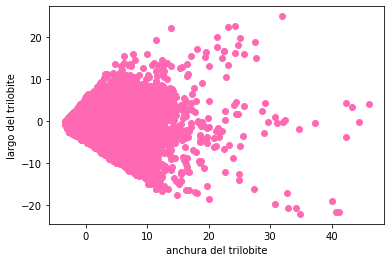

In [38]:
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], color = 'hotpink')
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

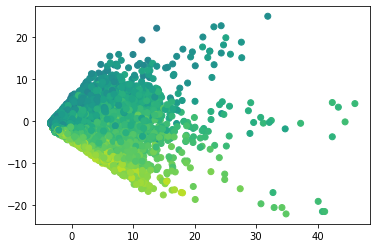

In [39]:
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=colors, cmap='viridis')
plt.show()

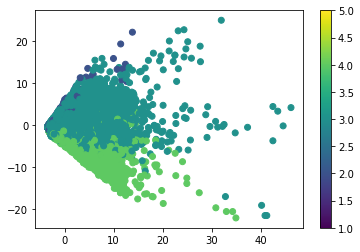

In [40]:
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['clasificacion_planteles2'], cmap='viridis')
plt.colorbar()
plt.show()

# Clustering

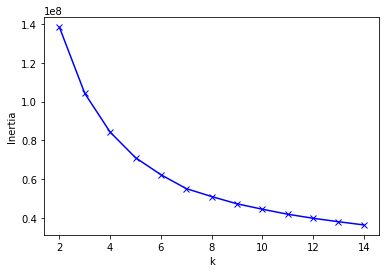

In [41]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_datos)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

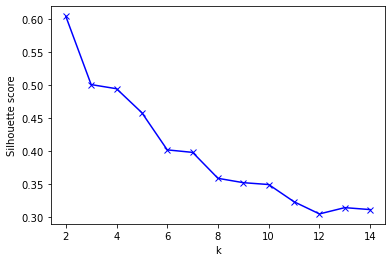

In [42]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_datos)
    y = km.predict(X_datos)
    silhouette_scores.append(silhouette_score(X_datos, y))
    
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [43]:
model = KMeans(n_clusters=6)
model.fit(X_datos)

KMeans(n_clusters=6)

In [44]:
X_datos['cluster'] = model.labels_
datos_vector['cluster'] = model.labels_

<ipython-input-44-6dda53099d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_datos['cluster'] = model.labels_


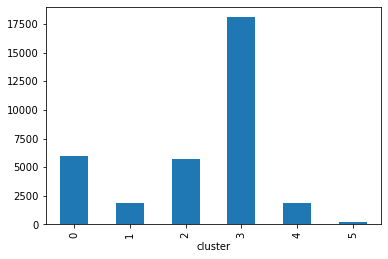

In [45]:
X_datos.groupby('cluster').count()['COLE_AREA_UBICACION'].plot(kind='bar')

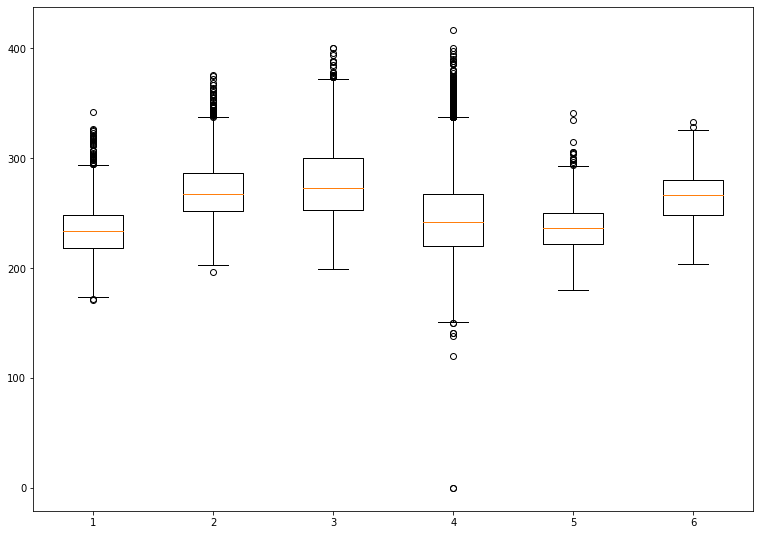

In [46]:
cluster1=datos_vector[datos_vector['cluster']==0]
cluster2=datos_vector[datos_vector['cluster']==1]
cluster3=datos_vector[datos_vector['cluster']==2]
cluster4=datos_vector[datos_vector['cluster']==3]
cluster5=datos_vector[datos_vector['cluster']==4]
cluster6=datos_vector[datos_vector['cluster']==5]

data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [47]:
datos_vector

,Unnamed: 0,CANTIDAD_ESTUDIANTES,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_DEDICACIONINTERNET_30 minutos o menos,...,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,PERIODO,PUNT_GLOBAL_mean,PUNT_GLOBAL_median,PUNT_GLOBAL_std,clasificacion_planteles,clasificacion_planteles2,cluster
0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,20211,264.000000,264.0,0.000000,Clase 3,3,3
1,1,1,0,0,0,1,0,0,1,0,...,0,0,0,20211,273.000000,273.0,0.000000,Clase 3,3,3
2,2,1,0,0,0,0,0,0,1,0,...,1,0,1,20211,332.000000,332.0,0.000000,Clase 4,4,3
3,3,1,0,0,0,0,0,0,1,0,...,1,0,1,20211,242.000000,242.0,0.000000,Clase 3,3,3
4,4,1,0,1,0,1,0,0,0,0,...,1,0,1,20211,246.000000,246.0,0.000000,Clase 3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,33783,78,1,0,1,1,0,1,1,7,...,63,6,70,20171,271.935897,277.0,37.068676,Clase 3,3,2
33784,33784,13,0,1,1,0,0,1,1,1,...,12,0,12,20171,299.384615,300.0,41.540218,Clase 3,3,3
33785,33785,91,0,0,1,3,0,1,1,4,...,86,8,81,20171,258.593407,258.0,35.211734,Clase 3,3,2
33786,33786,16,1,1,1,0,0,1,1,1,...,14,0,13,20171,336.000000,333.0,33.680855,Clase 4,4,3


In [16]:
cantidad_x=proyecciones[['PC1','PC2']]

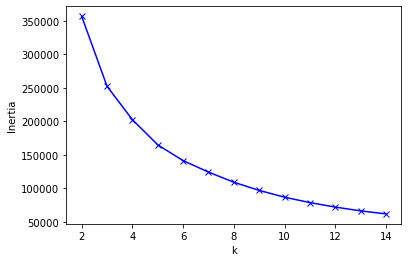

In [49]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [50]:
cantidad_x
#colors = np.array(datos_vector['PUNT_GLOBAL_mean'])

,PC1,PC2
0,-2.889335,-0.657510
1,-2.951948,-0.732430
2,-2.910100,-0.805754
3,-2.846209,-0.733572
4,-3.070914,-0.720458
...,...,...
33783,1.405686,-1.452494
33784,-1.735616,-2.356763
33785,3.174010,-2.268191
33786,-1.879486,-2.775183


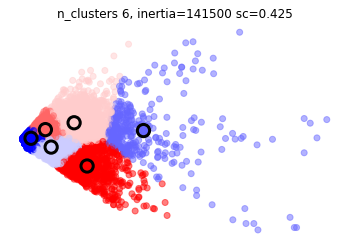

In [51]:
X=np.array(cantidad_x)
plot_cluster_predictions(KMeans(), X, n_clusters=6,cmap=plt.cm.bwr, show_metric=True)

In [52]:
model = KMeans(n_clusters=6)
model.fit(cantidad_x)

KMeans(n_clusters=6)

In [53]:
cantidad_x['cluster'] = model.labels_
datos_vector['cluster_PCA'] = model.labels_
cantidad_x.head(10)

<ipython-input-53-53200ebdf187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantidad_x['cluster'] = model.labels_


,PC1,PC2,cluster
0,-2.889335,-0.657510,0
1,-2.951948,-0.732430,0
2,-2.910100,-0.805754,0
3,-2.846209,-0.733572,0
4,-3.070914,-0.720458,0
5,-2.680760,-1.239785,0
6,-3.100428,-0.694999,0
7,-3.136123,-0.686436,0
8,-2.899761,-0.793591,0
9,-2.913326,-0.720600,0


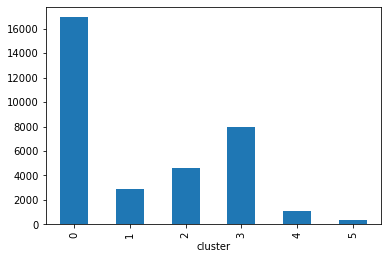

In [54]:
cantidad_x.groupby('cluster').count()['PC1'].plot(kind='bar')

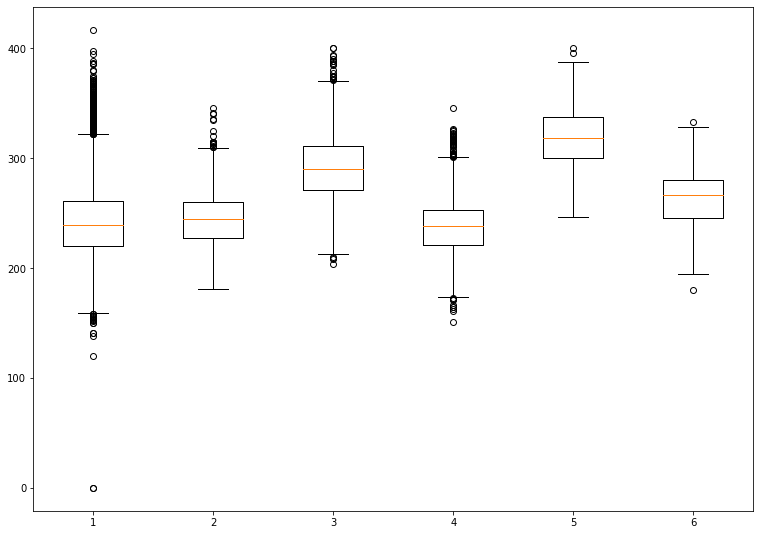

In [55]:
cluster1=datos_vector[datos_vector['cluster_PCA']==0]
cluster2=datos_vector[datos_vector['cluster_PCA']==1]
cluster3=datos_vector[datos_vector['cluster_PCA']==2]
cluster4=datos_vector[datos_vector['cluster_PCA']==3]
cluster5=datos_vector[datos_vector['cluster_PCA']==4]
cluster6=datos_vector[datos_vector['cluster_PCA']==5]
cluster7=datos_vector[datos_vector['cluster_PCA']==7]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster6['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

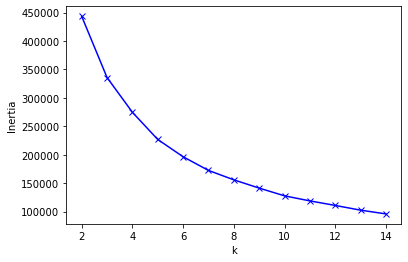

<Figure size 720x504 with 0 Axes>

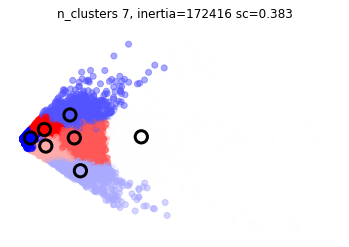

In [70]:
cantidad_x3=proyecciones[['PC1','PC2','PC3']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C3'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C3']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C3']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C3']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C3']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C3']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C3']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C3']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 , data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
plt.show()
#show plot


X=np.array(cantidad_x3)
plot_cluster_predictions(KMeans(), X, n_clusters=7,cmap=plt.cm.bwr, show_metric=True)
plt.show()

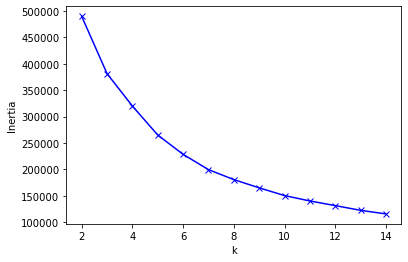

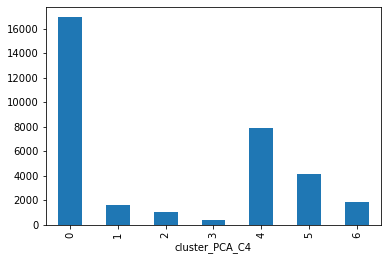

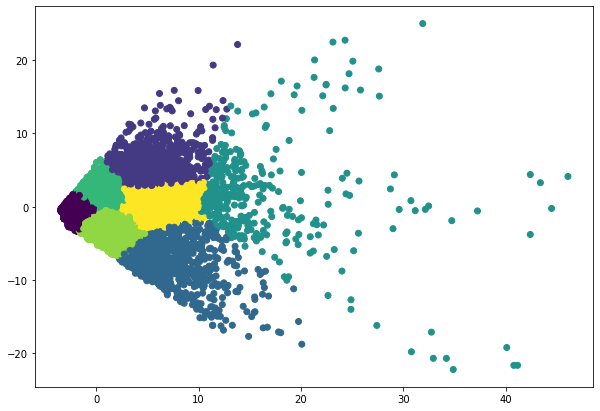

<Figure size 720x504 with 0 Axes>

In [73]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C4'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C4']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C4']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C4']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C4']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C4']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C4']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C4']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 , data_7 ]

datos_vector.groupby('cluster_PCA_C4').count()['PUNT_GLOBAL_mean'].plot(kind='bar')

fig = plt.figure(figsize =(10, 7))
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C4'], cmap='viridis')
#plt.colorbar()
plt.show()


fig = plt.figure(figsize =(10, 7))
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()

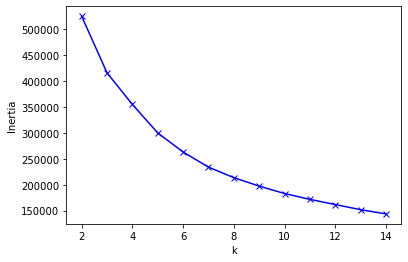

<Figure size 720x504 with 0 Axes>

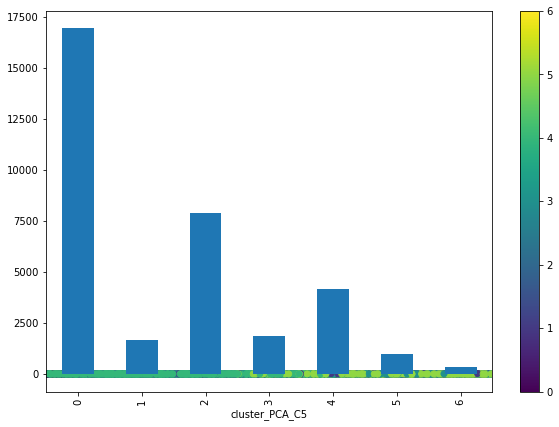

In [74]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C5'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C5']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C5']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C5']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C5']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C5']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C5']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C5']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6, data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
fig = plt.figure(figsize =(10, 7))
datos_vector.groupby('cluster_PCA_C5').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C5'], cmap='viridis')
plt.colorbar()
plt.show()

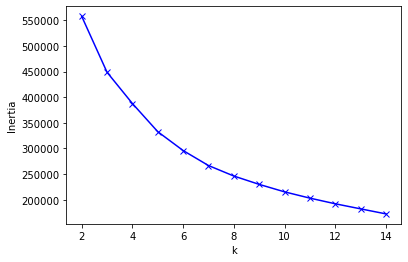

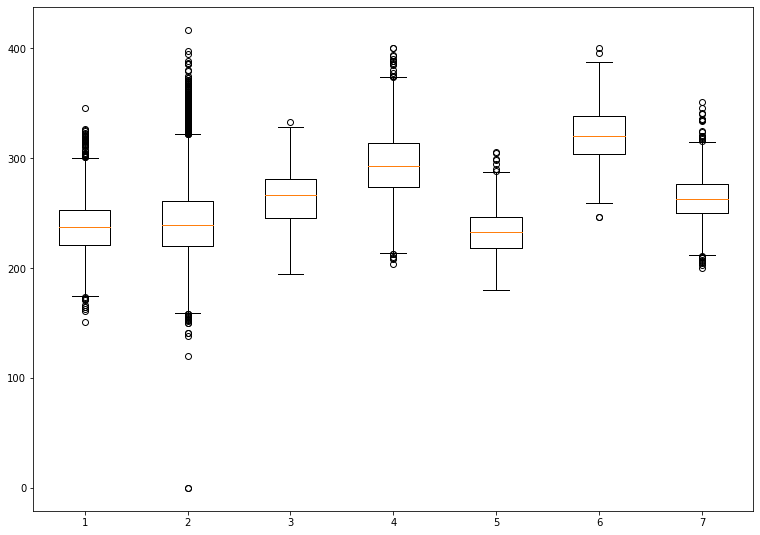

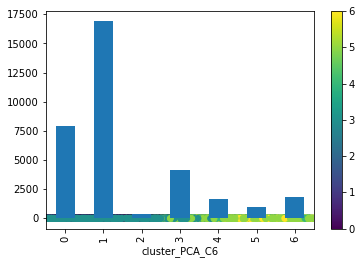

In [59]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C6'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C6']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C6']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C6']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C6']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C6']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C6']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C6']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 , data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C6').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C6'], cmap='viridis')
plt.colorbar()
plt.show()

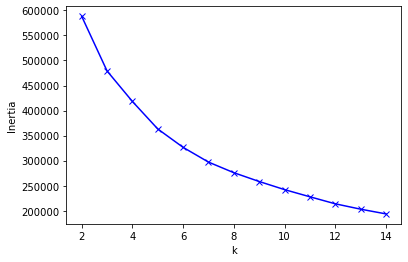

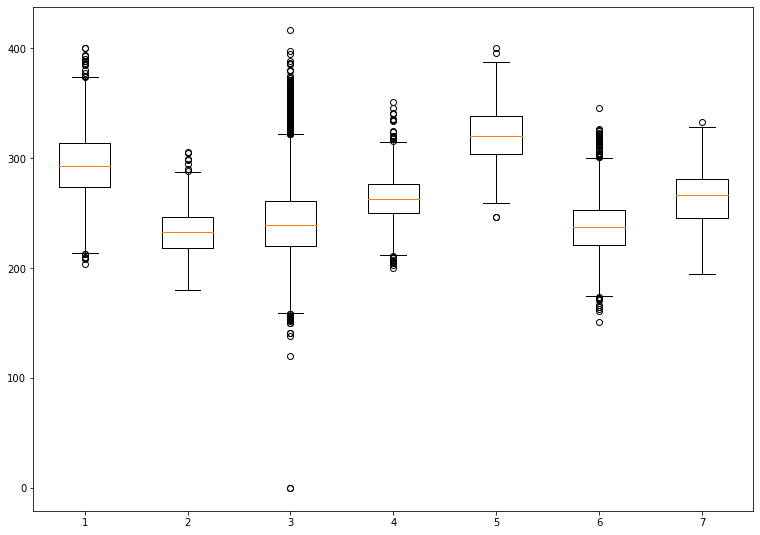

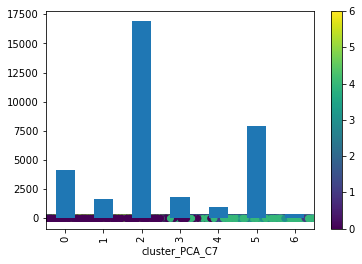

In [60]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C7'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C7']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C7']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C7']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C7']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C7']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C7']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C7']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6, data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C7').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C7'], cmap='viridis')
plt.colorbar()
plt.show()

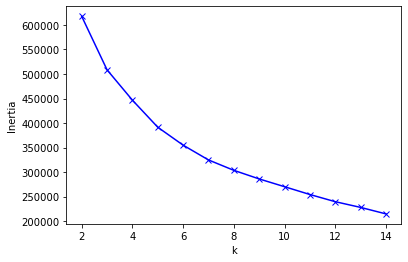

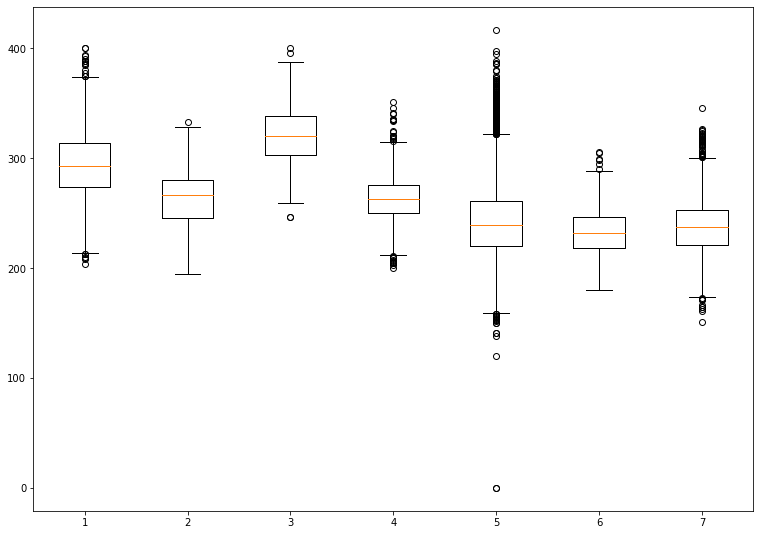

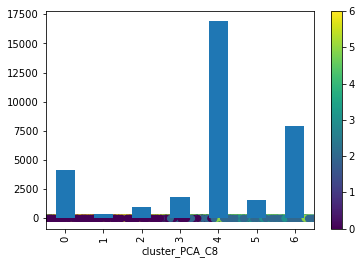

In [61]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C8'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C8']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C8']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C8']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C8']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C8']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C8']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C8']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 , data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C8').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C8'], cmap='viridis')
plt.colorbar()
plt.show()

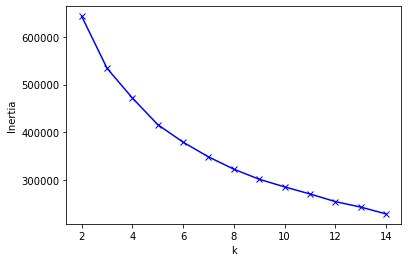

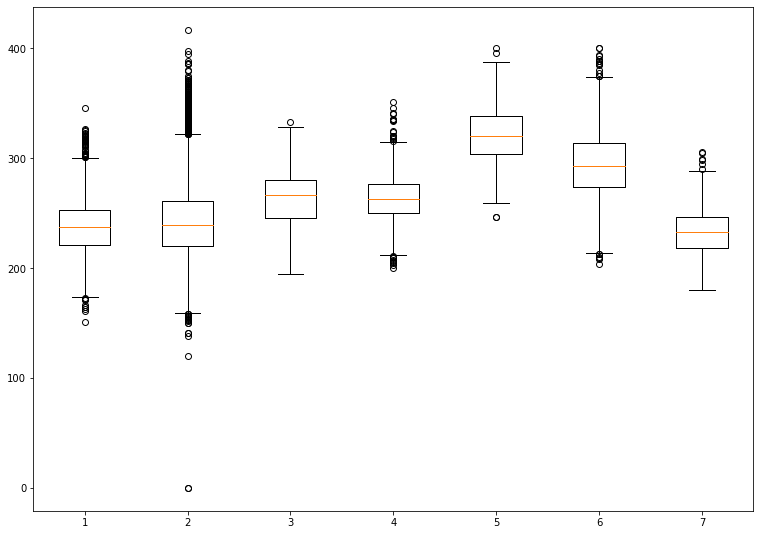

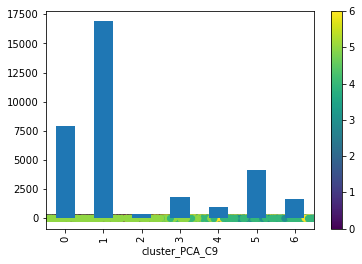

In [62]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C9'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C9']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C9']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C9']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C9']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C9']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C9']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C9']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 , data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C9').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C9'], cmap='viridis')
plt.colorbar()
plt.show()

In [63]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C10'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C10']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C10']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C10']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C10']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C10']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C10']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C10']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6, data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C10').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C10'], cmap='viridis')
plt.colorbar()
plt.show()

KeyboardInterrupt: 

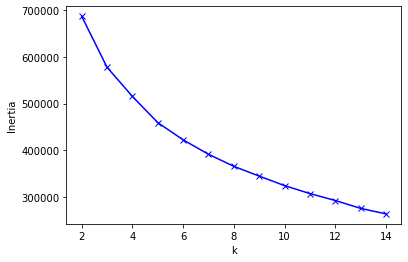

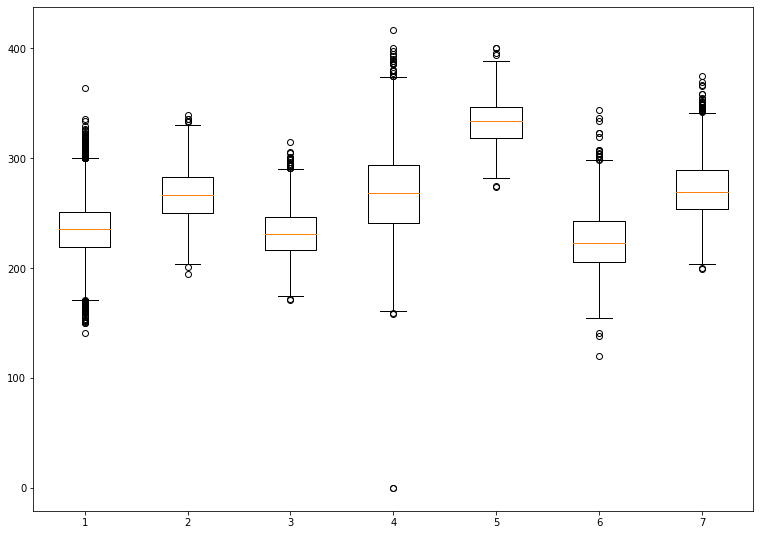

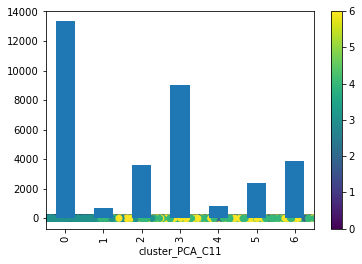

In [17]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x3)
datos_vector['cluster_PCA_C11'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C11']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C11']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C11']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C11']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C11']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C11']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C11']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6, data_7 ]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C11').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C11'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C12'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C12']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C12']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C12']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C12']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C12']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C12']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C12']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C12').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C12'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C13'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C13']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C13']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C13']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C13']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C13']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C13']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C13']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C13').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C13'], cmap='viridis')
plt.colorbar()
plt.show()

# SELECCIONADOS LOS 13 COMPONENTES

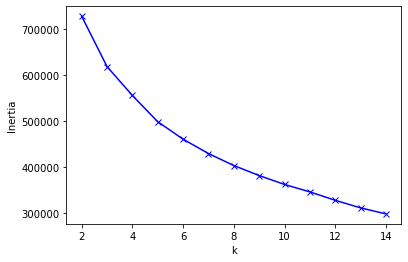

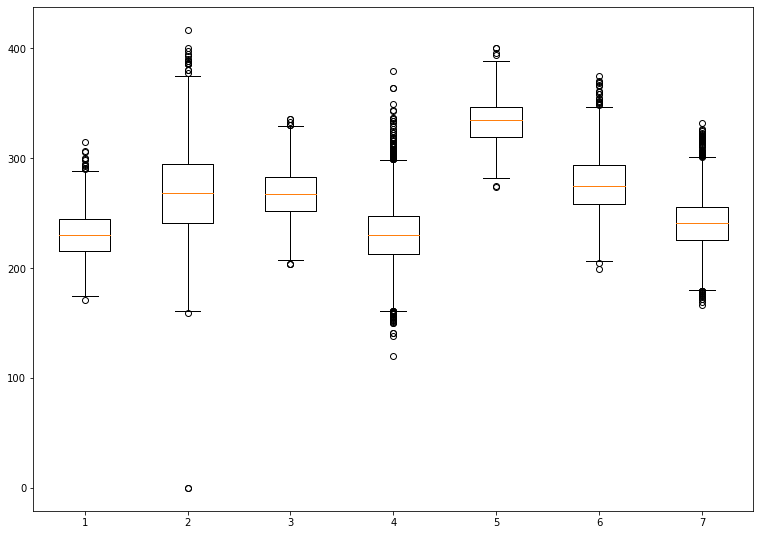

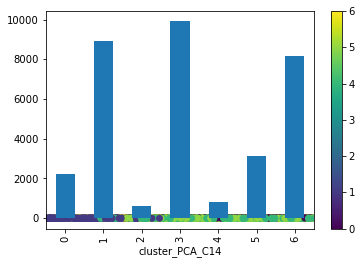

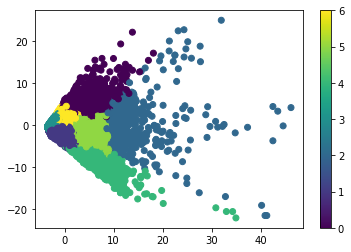

In [18]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x3)
datos_vector['cluster_PCA_C14'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C14']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C14']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C14']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C14']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C14']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C14']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C14']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C14').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C14'], cmap='viridis')
plt.colorbar()
plt.show()


plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C14'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']]

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C15'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C15']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C15']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C15']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C15']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C15']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C15']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C15']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C15').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C15'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                          'PC16']]
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C16'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C16']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C16']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C16']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C16']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C16']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C16']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C16']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C16').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C16'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                          'PC16','PC17']]
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_C17'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_C17']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_C17']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_C17']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_C17']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_C17']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_C17']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_C17']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])

data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_C17').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_C17'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
cantidad_x3=proyecciones
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cantidad_x3)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7)
model.fit(cantidad_x)
datos_vector['cluster_PCA_TOT'] = model.labels_
cluster1=datos_vector[datos_vector['cluster_PCA_TOT']==0]
cluster2=datos_vector[datos_vector['cluster_PCA_TOT']==1]
cluster3=datos_vector[datos_vector['cluster_PCA_TOT']==2]
cluster4=datos_vector[datos_vector['cluster_PCA_TOT']==3]
cluster5=datos_vector[datos_vector['cluster_PCA_TOT']==4]
cluster6=datos_vector[datos_vector['cluster_PCA_TOT']==5]
cluster7=datos_vector[datos_vector['cluster_PCA_TOT']==6]
data_1 = np.array(cluster1['PUNT_GLOBAL_mean'])
data_2 = np.array(cluster2['PUNT_GLOBAL_mean'])
data_3 = np.array(cluster3['PUNT_GLOBAL_mean'])
data_4 = np.array(cluster4['PUNT_GLOBAL_mean'])
data_5 = np.array(cluster5['PUNT_GLOBAL_mean'])
data_6 = np.array(cluster6['PUNT_GLOBAL_mean'])
data_7 = np.array(cluster7['PUNT_GLOBAL_mean'])
data = [data_1, data_2,  data_3 , data_4 , data_5 , data_6 ,data_7]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()
datos_vector.groupby('cluster_PCA_TOT').count()['PUNT_GLOBAL_mean'].plot(kind='bar')
plt.scatter(proyecciones['PC1'], proyecciones['PC2'], c=datos_vector['cluster_PCA_TOT'], cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
#datos_vector.to_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_kerner.xlsx")

In [ ]:
#proyecciones.to_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_pca.xlsx")

In [ ]:
datos_pc2=pd.read_csv("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_regresion_precovid.csv")
datos_pc2

In [ ]:
datos_pc2=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/datos_pca.xlsx")

In [ ]:
datos_pc2.columns

In [ ]:
map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')